In [67]:
# Declaring path variables to make Basemap work in jupyter hub. Make sure that the conda environment path matches yours
import os
os.environ['PATH'] = '/home/jovyan/my-conda-envs/qiime2-2019.1/bin:' + os.environ['PATH']
os.environ['PROJ_LIB'] = '/home/jovyan/my-conda-envs/qiime2-2019.1/share/proj'

# General Tool Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from mpl_toolkits.basemap import Basemap
import biota
import biota.plot as bpl
import collections
import matplotlib.patches as patches
from matplotlib.patches import Rectangle
import math
import pickle 

import lasio



%matplotlib inline

In [68]:
ChapwellList =['FORAKER 1207 1SMH-11',
 'FORAKER 1207 2UMH-11',
 'FORAKER 1207 3WH-11',
 'FORAKER 1207 4LMH-11',
 'FORAKER 1207 5WH-11',
 'FORAKER 1207 6UMH-11',
 'FORAKER 1207 7SMH-11',
 'FORAKER 1207 8UMH-11',
 'FORAKER 1207 9LMH-11',
 'FORAKER 1207 10UMH-11',
 'FORAKER 1207 11SMH-11']

In [69]:
Chapdfs  = {}
for i,well in enumerate(ChapwellList):
    idx = i+1
    wellname = ChapwellList[i]
    #filepath = "./SavedData08192019/{}.pkl".format(well) 
    filepath = "./PlotPickles/{}.pkl".format(wellname) 
    file = open(filepath,'rb')
    Chapdfs[idx] = pickle.load(file)

In [70]:
Chapdfs[11].head()

,Well,PERIOD,TP,CP,BH,GROSS OIL,GROSS WTR,GROSS GAS,GROSS BOE,Downtime,Lift,Choke,Cum Prod,Days Online,Formation,Pad,Comp Order
1178,FORAKER 1207 11SMH-11,4/5/2019,0.0,1268.0,NaN,366.92,664.0,172.0,395.5867,0.0,FLOW,28.25,366.92,1.0,SM,Pad1,6Z
1179,FORAKER 1207 11SMH-11,4/6/2019,0.0,1328.0,NaN,718.20,2176.0,1108.0,902.8667,0.0,FLOW,32.75,1085.12,2.0,SM,Pad1,6Z
1180,FORAKER 1207 11SMH-11,4/7/2019,0.0,1247.0,NaN,412.89,2525.0,1678.0,692.5567,0.0,FLOW,34.00,1498.01,3.0,SM,Pad1,6Z
1181,FORAKER 1207 11SMH-11,4/8/2019,0.0,1247.0,NaN,631.48,3212.0,1576.0,894.1467,0.0,FLOW,34.00,2129.49,4.0,SM,Pad1,6Z
1182,FORAKER 1207 11SMH-11,4/9/2019,0.0,1219.0,NaN,755.55,2116.0,1890.0,1070.5500,0.0,FLOW,35.75,2885.04,5.0,SM,Pad1,6Z


In [6]:
Maxliquid = [4300,4600,3280,2000,3110,2200,
            2690,4100,3400,2800,4300]

In [7]:
MaxDays = [9,15,9,8,6,8,10,10,11,3,8]


In [8]:
for i,well in enumerate(Chapdfs):
    Chapdfs[well]['Liquid Rate'] = Chapdfs[well]['GROSS OIL'] + Chapdfs[well]['GROSS WTR']
    #Chapdfs[well]['Norm Liquid Rate'] = Chapdfs[well]['Liquid Rate'] / Maxliquid [i]
    #Chapdfs[well]['NormDays'] = Chapdfs[well]['Days Online'] - MaxDays[i]

In [9]:
Chapdfs[11].head()

,Well,PERIOD,TP,CP,BH,GROSS OIL,GROSS WTR,GROSS GAS,GROSS BOE,Downtime,Lift,Choke,Cum Prod,Days Online,Formation,Pad,Comp Order,Liquid Rate
1178,FORAKER 1207 11SMH-11,4/5/2019,0.0,1268.0,NaN,366.92,664.0,172.0,395.5867,0.0,FLOW,28.25,366.92,1.0,SM,Pad1,6Z,1030.92
1179,FORAKER 1207 11SMH-11,4/6/2019,0.0,1328.0,NaN,718.20,2176.0,1108.0,902.8667,0.0,FLOW,32.75,1085.12,2.0,SM,Pad1,6Z,2894.20
1180,FORAKER 1207 11SMH-11,4/7/2019,0.0,1247.0,NaN,412.89,2525.0,1678.0,692.5567,0.0,FLOW,34.00,1498.01,3.0,SM,Pad1,6Z,2937.89
1181,FORAKER 1207 11SMH-11,4/8/2019,0.0,1247.0,NaN,631.48,3212.0,1576.0,894.1467,0.0,FLOW,34.00,2129.49,4.0,SM,Pad1,6Z,3843.48
1182,FORAKER 1207 11SMH-11,4/9/2019,0.0,1219.0,NaN,755.55,2116.0,1890.0,1070.5500,0.0,FLOW,35.75,2885.04,5.0,SM,Pad1,6Z,2871.55


In [21]:
Firstday = Chapdfs[11]['Norm Liquid Rate'].max()

In [29]:
Chapdfs[11].columns

Index(['Well', 'PERIOD', 'TP', 'CP', 'BH', 'GROSS OIL', 'GROSS WTR',
       'GROSS GAS', 'GROSS BOE', 'Downtime', 'Lift', 'Choke', 'Cum Prod',
       'Days Online', 'Formation', 'Pad', 'Comp Order', 'Liquid Rate',
       'Norm Liquid Rate'],
      dtype='object')

In [34]:
index11 = Chapdfs[11]['Norm Liquid Rate'][Chapdfs[11]['Norm Liquid Rate'] == Firstday].index.tolist()

In [52]:
Chapdfs[11].iloc[1,13]

2.0

In [54]:
#fofo = Chapdfs[11].iloc[index11,]

In [55]:
MaxDays = [9,15,9,8,6,8,10,10,11,3,8]

In [71]:
#Chapdfs[11].loc[Chapdfs[11]['Norm Liquid Rate'].idxmax()]

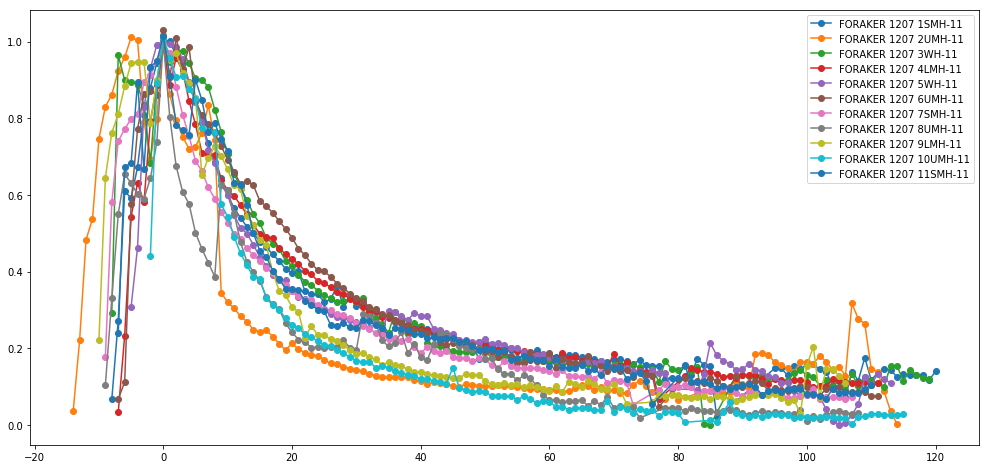

In [77]:
fig, ax = plt.subplots(1, figsize=(17,8))
for well in Chapdfs:
    #Plot Production Data
    wellname = Chapdfs[well].iloc[0,0]
    ax.plot(Chapdfs[well]['NormDays'], Chapdfs[well]['Norm Liquid Rate'],marker="o", markersize = 6, alpha = 1, label=wellname)
plt.legend()

In [5]:
#Plot Production Plots

#Save images
dirpath = os.getcwd()
folderloc = dirpath + '/ImagesPresentation/'
    
try:  
     os.makedirs(folderloc)
except OSError:  
     print ("Creation of the directory %s failed" % folderloc)
else:  
        print ("Successfully created the directory %s" % folderloc)
            

Creation of the directory /home/jovyan/Practice/ImagesPresentation/ failed


In [23]:
dfs = Chapdfs

In [25]:
wellnames = ChapwellList

In [34]:
dfs = [Chapdfs[2],Chapdfs[3]]

TypeError: list indices must be integers or slices, not DataFrame

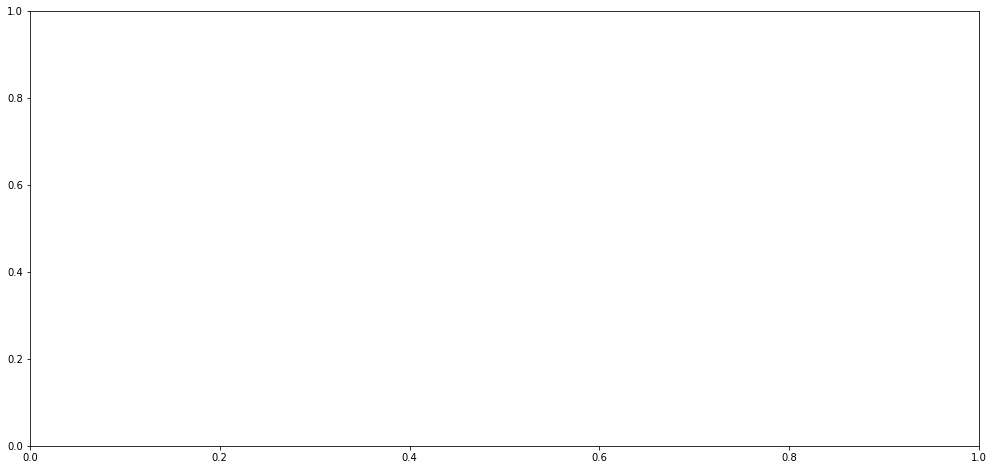

In [35]:
#Loop through wells
for i,well in enumerate(dfs):
    
    #import relevant datetime and plotting modules
    from datetime import datetime
    import matplotlib.dates as mdates
    from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU
    import matplotlib.ticker as ticker
    
    #Plot Production Data
    fig, ax = plt.subplots(1, figsize=(17,8))
    ax.plot(dfs[well].PERIOD, dfs[well]['GROSS OIL'],marker='o', c='green', label='Oil Rate')
    ax.set_title(wellnames[i])
    ax.set_ylabel('Oil Rate [STB]')
    ax.yaxis.set_label_coords(-0.03,0.5)
    ax.set_ylim(bottom=0)
    
    #Set axis parameters for second left axis
    par2 = ax.twinx()
    par2.spines['left'].set_position(('outward', 60))
    par2.yaxis.set_ticks_position('left')
    par2.set_ylabel('Water Rate [STB]')
    par2.yaxis.set_label_position("left")
    #Plot Data
    water = par2.plot(dfs[well].PERIOD, dfs[well]['GROSS WTR'], marker='o',c='blue', label='Water Rate')
    par2.set_ylim(bottom=0)
    #loc = plticker.MultipleLocator(base=1.0) # this locator puts ticks at regular intervals
    #pars.yaxis.set_major_locator(loc)
    
    #Normalize Tick Intervals on Left Y axis
    y_min, y_max = ax.get_ylim()
    y2_min, y2_max = par2.get_ylim()
    ticks = [(tick - y_min)/(y_max - y_min) for tick in ax.get_yticks()]
    ticks2 = [tick * y2_max for tick in ticks]
    ticks3 = [tick * y_max for tick in ticks]
    par2.set_yticks(ticks2)
    ax.set_yticks(ticks3)
    
    #Plot Pressures
    ax2 = ax.twinx()
    ax2.plot(dfs[well].PERIOD, dfs[well]['CP'], linestyle = '-.', c='black', label='Casing Pressure')
    ax2.plot(dfs[well].PERIOD, dfs[well]['TP'], linestyle = '--', c='black', label='Tubing Pressure')
    ax2.set_ylabel('Tubing, Casing Pressure [psi]')
    ax2.yaxis.set_label_position("right")
    y_ax2min, y_ax2max = ax2.get_ylim()
    ax2.set_ylim(top = y_ax2max*1.3)
    
    #Set axis parameters for second right axis
    par3 = ax.twinx()
    par3.spines['right'].set_position(('outward', 60))
    par3.yaxis.set_ticks_position('right')
    par3.set_ylabel('Watercut[ ], Avg Choke [64ths]')
    par3.yaxis.set_label_position("right")
    #Plot Data
    choke = par3.step(dfs[well].PERIOD, dfs[well]['Choke'],c='brown', label='Choke')
    wct = par3.plot(dfs[well].PERIOD, (100*dfs[well]['GROSS WTR']/(dfs[well]['GROSS OIL']+dfs[well]['GROSS WTR'])),\
                    linestyle = '--', c='blue',label='Water Cut')
    par3.set_ylim(bottom=0)
    par3.set_ylim(top=100)
    
    #Normalize Tick Intervals on Right Y axis
    y_ax2min, y_ax2max = ax2.get_ylim()
    ypar3_min, ypar3_max = par3.get_ylim()
    ticks_r = [(tick - ypar3_min)/(ypar3_max - ypar3_min) for tick in par3.get_yticks()]
    #ticks2_r = [tick * y2_max for tick in ticks]
    ticks3_r = [tick * y_ax2max for tick in ticks_r]
    #par2.set_yticks(ticks2)
   # ax2.set_yticks(ticks3_r)
    
    #Add legends
    fig.legend(bbox_to_anchor=(0.35, 0.28, 0.5, 0.5))
    
    #Reformat Date Series
    #Set tick marks intervals for x-axis, set minor ticks daily, major ticks weekly (every monday)
    days = mdates.DayLocator()
    myFmt = mdates.DateFormatter("%m-%d")
    weeks = mdates. WeekdayLocator(byweekday=MO)
    #Assign ticks
    ax.xaxis.set_minor_locator(days)
    ax.xaxis.set_major_locator(weeks)
    ax.xaxis.set_major_formatter(myFmt)
    
    #Save Image
    #imageloc = folderloc +'/' + wellname[i] +'.png'
    #fig.savefig(imageloc, dpi=100, bbox_inches='tight')
        

In [39]:
#Define Groups of  Wells
Group1 = [Chapdfs[10],Chapdfs[8]]
Group2 = [Chapdfs[6]]
Group3 = [Chapdfs[2]]
Grouplist = [Group1,Group2,Group3]          
#Group3 = [Chapdfs[1]]
#Grouplist = [Group1,Group2,Group3]

#Group Colors
#groupcolor = ['lightseagreen','darkslategray','R']
groupcolor = ['lightseagreen','darkslategray','royalblue']

#Sample Wells
#Comparewells = Group1+Group2+Group3
Comparewells = Group1+Group2+Group3

#Assign wellmarkers
keys=[]
markers= ['o','^','v','D','x']
#markers= ['o','^','v','D','x','P']
for i,well in enumerate (Comparewells):
    keys.append(Comparewells[i].iloc[0,0])
    
markerdictionary = dict(zip(keys,markers))

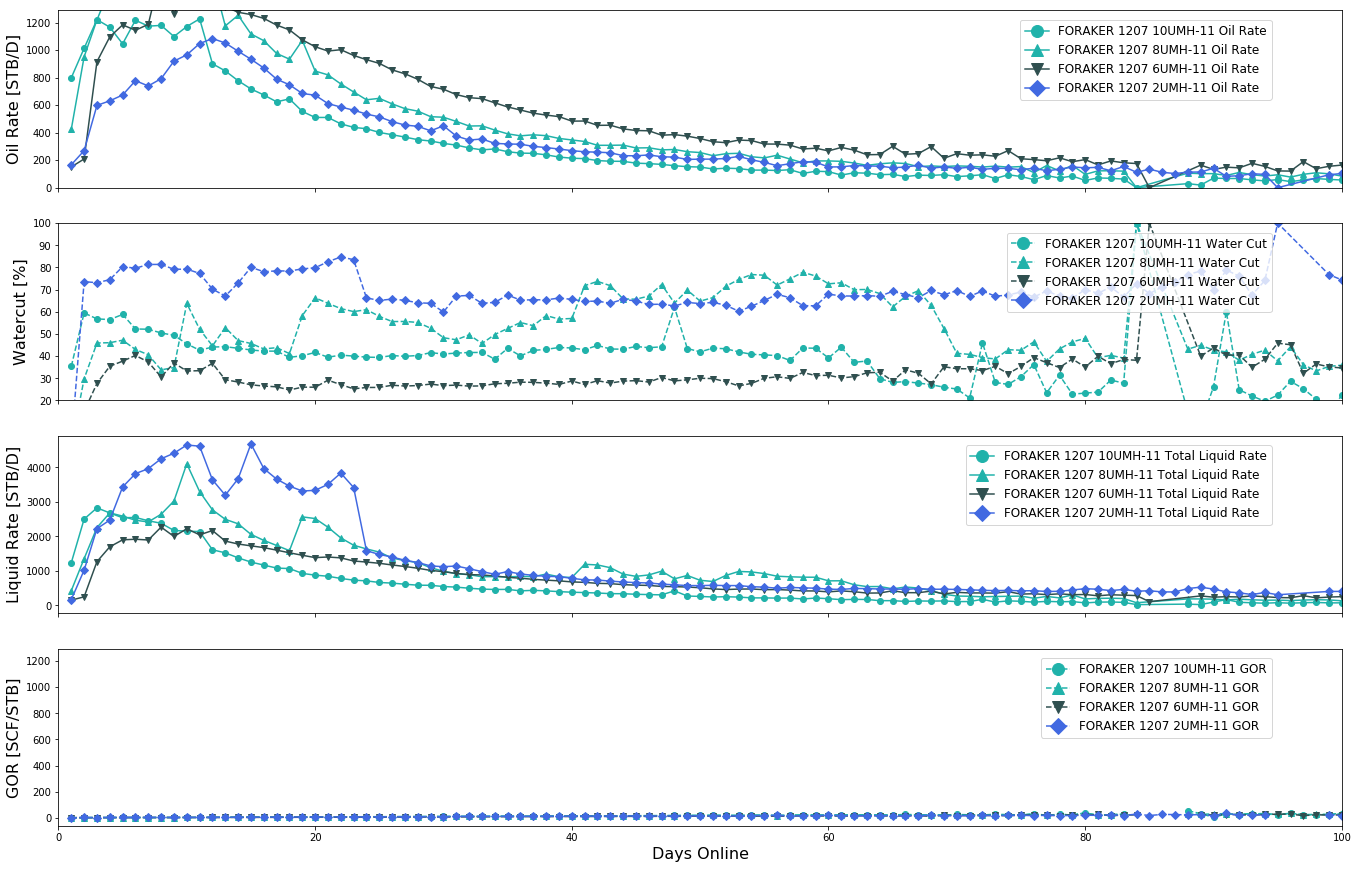

In [41]:
#import relevant datetime and plotting modules
numsubplots = 4
fig, axs = plt.subplots(numsubplots, sharex = True, figsize=(23,15))

for i,group in enumerate(Grouplist):
    #Padname = Padnames[i]
    Comparewells = Grouplist[i]
    wellcolor = groupcolor[i]
    #marker = 
    #Plot Production Data
    for i,well in enumerate(Comparewells):
        
        wellname = Comparewells[i].iloc[0,0]
        wellmarker = markerdictionary[wellname]
        #wellcolor = colormapfm[formations[wellname]]
        #wellcolor = cm(1.*i/NUM_COLORS)
        axs[0].plot(Comparewells[i]['Days Online'], Comparewells[i]['GROSS OIL'],marker=wellmarker, markersize = 6, alpha = 1, \
                #linewidth=0, \
                c=wellcolor, label = wellname + ' '+ 'Oil Rate')
        axs[1].plot(Comparewells[i]['Days Online'], (100*Comparewells[i]['GROSS WTR']/(Comparewells[i]['GROSS OIL']+Comparewells[i]['GROSS WTR'])),\
                       marker=wellmarker, linestyle = '--', c=wellcolor ,label=wellname + ' '+'Water Cut')

        axs[2].plot(Comparewells[i]['Days Online'], (Comparewells[i]['GROSS OIL']+Comparewells[i]['GROSS WTR']),\
                                                marker=wellmarker, markersize = 6, alpha = 1, \
                c=wellcolor, label = wellname + ' '+ 'Total Liquid Rate')
        
        axs[3].plot(Comparewells[i]['Days Online'], (Comparewells[i]['GROSS GAS']/Comparewells[i]['GROSS OIL']),\
                                                marker=wellmarker,linestyle='--', markersize = 6, alpha = 1, \
                c=wellcolor, label = wellname + ' '+ 'GOR')        


        #Add legends
        axs[0].set_ylabel('Oil Rate [STB/D]',fontsize = 16)
        axs[0].set_ylim(bottom=0)
        axs[0].set_xlim([0,100])
        #ax.yaxis.set_label_coords(-0.03,0.5)
        axs[1].set_ylabel('Watercut [%]',fontsize = 16)
        axs[1].set_ylim([20,100])
        #axs[2].set_xlabel('Days Online', fontsize = 16)
        axs[2].set_ylabel('Liquid Rate [STB/D]',fontsize = 16)
        axs[3].set_xlabel('Days Online', fontsize = 16)
        axs[3].set_ylabel('GOR [SCF/STB]',fontsize = 16)

    for idx in range(numsubplots):
        axs[idx].legend(bbox_to_anchor=(0.25, 0.28, 0.70, 0.70),markerscale=2, fontsize = 12)
        #axs.tick_params(axis="both", labelsize=16)
        #axs[0].legend(bbox_to_anchor=(0.25, 0.28, 0.75, 0.72),markerscale=3, fontsize = 16)
        
#Save Image
#imageloc = folderloc +'/' + 'Silvertip Oil Rate'+'.png'
#imageloc = PlotlocCSVs +'/' + 'Silvertip composite plot AlphaLZs'+'.png'
#imageloc = PlotlocCSVs +'/' + 'Silvertip composite plot UpperBetaLZs'+'.png'
#fig.savefig(imageloc, dpi=200, bbox_inches='tight')


In [72]:
#Chapdfs[11].head()

In [7]:
#Plot Production Plots

#Save images
dirpath = os.getcwd()
folderloc = dirpath + '/ImagesPresentation/ByFormation'
    
try:  
     os.makedirs(folderloc)
except OSError:  
     print ("Creation of the directory %s failed" % folderloc)
else:  
        print ("Successfully created the directory %s" % folderloc)

Creation of the directory /home/jovyan/Practice/ImagesPresentation/ByFormation failed


In [7]:
#Sample Wells
Comparewells = [Chapdfs[11],Chapdfs[9],Chapdfs[7],Chapdfs[4]]

In [66]:
Chapdfs[11].iloc[0,14]

'SM'

In [8]:
#UpperMeramec Wells
#LowerM = [Chapdfs[10],Chapdfs[8],Chapdfs[6],Chapdfs[2]]
#Comparewells = UpperMer

In [23]:
#lowerer Wells
#lowerer = [Chapdfs[4],Chapdfs[9]]
#Comparewells = lowerer

In [25]:
#Syc Wells
#Syc = [Chapdfs[11],Chapdfs[7],Chapdfs[1]]
#Comparewells = Syc

In [10]:
#Syc Wells
#Syc = [Chapdfs[11],Chapdfs[7],Chapdfs[1]]
Comparewells = [Chapdfs[10],Chapdfs[8]]

In [17]:
#Woodford
#Woodfordwells = [Chapdfs[5],Chapdfs[3]]
#Comparewells = Woodfordwells

In [9]:
#Assign wellmarkers
keys=[]
markers= ['o','^','v','D','x']
#markers= ['o','^','v','D','x','P']
for i,well in enumerate (Comparewells):
    keys.append(Comparewells[i].iloc[0,0])
    
markerdictionary = dict(zip(keys,markers))

In [10]:
#Assign color palletes by formation
colormapfm = {'UM':'lightseagreen','LM':'darkslategray','SM':'green','WF':'darkgreen'}

In [54]:
#Syc Wells
#Syc = [Chapdfs[11],Chapdfs[7],Chapdfs[1]]
#Comparewells = [Chapdfs[10],Chapdfs[8]]
Comparewells = [Chapdfs[11],Chapdfs[9],Chapdfs[7],Chapdfs[4],Chapdfs[1]]

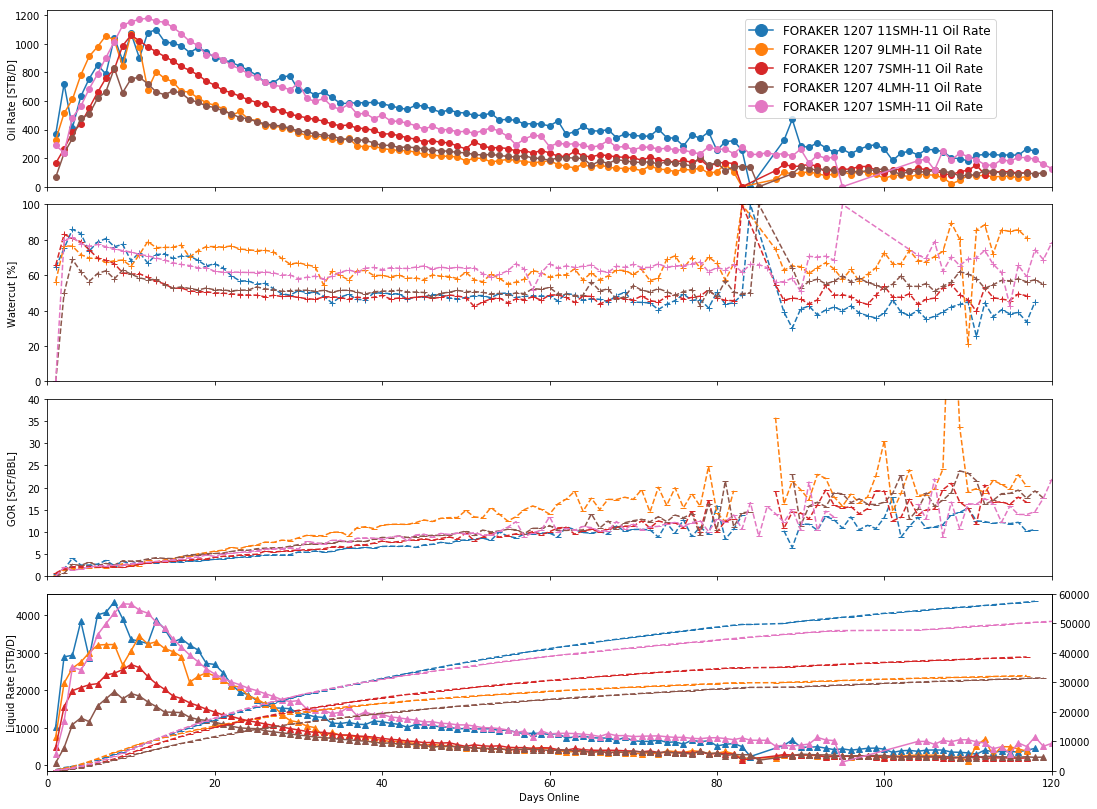

In [55]:
#import relevant datetime and plotting modules
import matplotlib
import pylab
labelfont = 10
NUM_COLORS = 6
cm = pylab.get_cmap('tab10')

#cm = pylab.get_cmap('tab20')

#Plot Production Data
#fig, axs = plt.subplots(4, sharex = True, figsize=(24,7))
fig, axs = plt.subplots(4, sharex = True, figsize=(18,14))
plt.subplots_adjust(hspace=0.1)
ax2 = axs[3].twinx()
for i,well in enumerate(Comparewells):
    wellname = Comparewells[i].iloc[0,0]
    fm = Comparewells[i].iloc[0,14]
    #wellcolor = colormapfm[fm]
    wellcolor = cm(1.*i/NUM_COLORS)
    #wellcolor = plotcolors [i]
    axs[0].plot(Comparewells[i]['Days Online'], Comparewells[i]['GROSS OIL'],marker='o', markersize = 6, alpha = 1, \
            #linewidth=0, \
            c=wellcolor, label = wellname + ' '+ 'Oil Rate')
    axs[1].plot(Comparewells[i]['Days Online'], (100*Comparewells[i]['GROSS WTR']/(Comparewells[i]['GROSS OIL']+Comparewells[i]['GROSS WTR'])),\
                   marker='+', linestyle = '--', c=wellcolor ,label=wellname + ' '+'Water Cut')
    axs[2].plot(Comparewells[i]['Days Online'], (Comparewells[i]['GROSS GAS']/(Comparewells[i]['GROSS OIL'])),\
                   marker='_', linestyle = '--', c=wellcolor ,label=wellname + ' '+'GOR')
    axs[3].plot(Comparewells[i]['Days Online'], (Comparewells[i]['GROSS OIL']+Comparewells[i]['GROSS WTR']),\
                                            marker='^', markersize = 6, alpha = 1, \
            c=wellcolor, label = wellname + ' '+ 'Total Liquid Rate')
    
    ax2.plot(Comparewells[i]['Days Online'], (Comparewells[i]['Cum Prod']),\
                                            marker='_', linestyle = '--',markersize = 6, alpha = 1, \
            c=wellcolor, label = wellname + ' '+ 'Total Liquid Rate')    
    
#Add legends
#fig.legend(bbox_to_anchor=(0.25, 0.28, 0.55, 0.52),markerscale=3, fontsize = 16)
#ax.set_ylabel('Oil Rate [STB/D]',fontsize = 16)
axs[0].set_ylabel('Oil Rate [STB/D]',fontsize = labelfont)
axs[0].set_ylim(bottom=0)
axs[0].set_xlim([0,120])

#ax.yaxis.set_label_coords(-0.03,0.5)
axs[1].set_ylabel('Watercut [%]',fontsize = labelfont)
axs[2].set_ylabel('GOR [SCF/BBL]',fontsize = labelfont)
axs[3].set_ylabel('Liquid Rate [STB/D]',fontsize = labelfont)
#ax.set_ylim(top=8000)
#ax.set_ylim(top=4500)

axs[1].set_ylim([0,100])
axs[2].set_ylim([0,40])
ax2.set_ylim([0,60000])
axs[3].set_xlabel('Days Online', fontsize = labelfont)

axs[0].yaxis.set_label_coords(-0.03,0.5)
axs[1].yaxis.set_label_coords(-0.03,0.5)
axs[2].yaxis.set_label_coords(-0.03,0.5)
axs[3].yaxis.set_label_coords(-0.03,0.5)

for idx in range(1):
    axs[idx].legend(bbox_to_anchor=(0.25, 0.28, 0.70, 0.70),markerscale=2, fontsize = 12)
    
#for idx in range(3):
#    axs[idx].legend(bbox_to_anchor=(0.25, 0.28, 0.70, 0.70),markerscale=2, fontsize = 12)
#axs.tick_params(axis="both", labelsize=16)
#axs[0].legend(bbox_to_anchor=(0.25, 0.28, 0.75, 0.72),markerscale=3, fontsize = 16)
#Save Image
#imageloc = folderloc +'/' + 'Foraker Pad 10 and 8'+'.png'
#imageloc = PlotlocCSVs +'/' + 'Silvertip composite plot AlphaLZs'+'.png'
#imageloc = PlotlocCSVs +'/' + 'Silvertip composite plot UpperBetaLZs'+'.png'
#fig.savefig(imageloc, dpi=200, bbox_inches='tight')
        

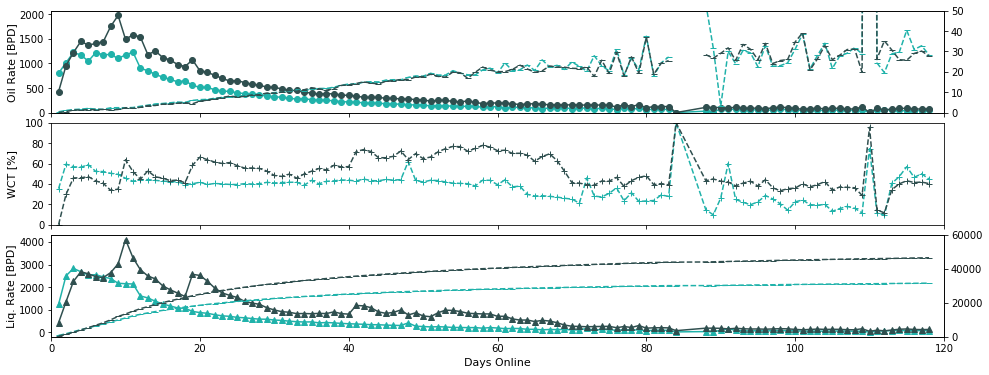

In [61]:
#import relevant datetime and plotting modules
import matplotlib
import pylab
labelfont = 11
NUM_COLORS = 6
cm = pylab.get_cmap('tab10')
#cm = pylab.get_cmap('tab20')

#Plot Production Data
fig, axs = plt.subplots(3, sharex = True, figsize=(16,6))
plt.subplots_adjust(hspace=0.1)
ax2 = axs[2].twinx()
axgor = axs[0].twinx()
for i,well in enumerate(Comparewells):
    wellname = Comparewells[i].iloc[0,0]
    fm = Comparewells[i].iloc[0,14]
    #wellcolor = colormapfm[fm]
    #wellcolor = cm(1.*i/NUM_COLORS)
    wellcolor = plotcolors [i]
    axs[0].plot(Comparewells[i]['Days Online'], Comparewells[i]['GROSS OIL'],marker='o', markersize = 6, alpha = 1, \
            #linewidth=0, \
            c=wellcolor, label = wellname + ' '+ 'Oil Rate')
    axs[1].plot(Comparewells[i]['Days Online'], (100*Comparewells[i]['GROSS WTR']/(Comparewells[i]['GROSS OIL']+Comparewells[i]['GROSS WTR'])),\
                   marker='+', linestyle = '--', c=wellcolor ,label=wellname + ' '+'Water Cut')
    axgor.plot(Comparewells[i]['Days Online'], (Comparewells[i]['GROSS GAS']/(Comparewells[i]['GROSS OIL'])),\
                   marker='_', linestyle = '--', c=wellcolor ,label=wellname + ' '+'GOR')
    axs[2].plot(Comparewells[i]['Days Online'], (Comparewells[i]['GROSS OIL']+Comparewells[i]['GROSS WTR']),\
                                            marker='^', markersize = 6, alpha = 1, \
            c=wellcolor, label = wellname + ' '+ 'Total Liquid Rate')
    ax2.plot(Comparewells[i]['Days Online'], (Comparewells[i]['Cum Prod']),\
                                            marker='_', linestyle = '--',markersize = 6, alpha = 1, \
            c=wellcolor, label = wellname + ' '+ 'Total Liquid Rate')    
    
#Add legends
#fig.legend(bbox_to_anchor=(0.25, 0.28, 0.55, 0.52),markerscale=3, fontsize = 16)
#ax.set_ylabel('Oil Rate [STB/D]',fontsize = 16)
axs[0].set_ylabel('Oil Rate [BPD]',fontsize = labelfont)
axs[0].set_ylim(bottom=0)
axs[0].set_xlim([0,120])

#ax.yaxis.set_label_coords(-0.03,0.5)
axs[1].set_ylabel('WCT [%]',fontsize = labelfont)
axs[2].set_ylabel('Liq. Rate [BPD]',fontsize = labelfont)
#ax.set_ylim(top=8000)
#ax.set_ylim(top=4500)

axs[1].set_ylim([0,100])
ax2.set_ylim([0,60000])
axgor.set_ylim([0,50])
axs[2].set_xlabel('Days Online', fontsize = labelfont)

axs[0].yaxis.set_label_coords(-0.038,0.5)
axs[1].yaxis.set_label_coords(-0.038,0.5)
axs[2].yaxis.set_label_coords(-0.038,0.5)


#for idx in range(1):
#    axs[idx].legend(bbox_to_anchor=(0.25, 0.28, 0.70, 0.70),markerscale=2, fontsize = 12)
    
#for idx in range(3):
#    axs[idx].legend(bbox_to_anchor=(0.25, 0.28, 0.70, 0.70),markerscale=2, fontsize = 12)
#axs.tick_params(axis="both", labelsize=16)
#axs[0].legend(bbox_to_anchor=(0.25, 0.28, 0.75, 0.72),markerscale=3, fontsize = 16)
#Save Image
imageloc = folderloc +'/' + 'Foraker Pad 10 and 8'+'.png'
#imageloc = PlotlocCSVs +'/' + 'Silvertip composite plot AlphaLZs'+'.png'
#imageloc = PlotlocCSVs +'/' + 'Silvertip composite plot UpperBetaLZs'+'.png'
fig.savefig(imageloc, dpi=200, bbox_inches='tight')
        

NameError: name 'ax2' is not defined

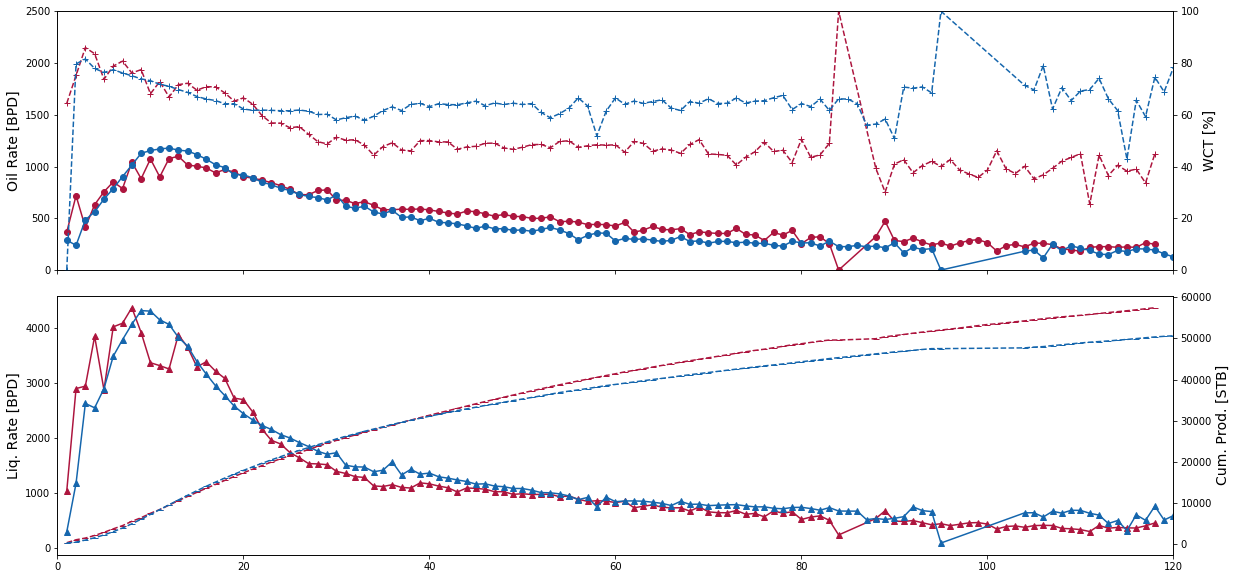

In [92]:
#import relevant datetime and plotting modules
import matplotlib
import pylab
labelfont = 14
NUM_COLORS = 6
cm = pylab.get_cmap('tab10')
#cm = pylab.get_cmap('tab20')


#Plot Production Data
fig, axs = plt.subplots(2, sharex = True, figsize=(20,10))
plt.subplots_adjust(hspace=0.1)
axcum = axs[1].twinx()
axw = axs[0].twinx()
for i,well in enumerate(Comparewells):
    wellname = Comparewells[i].iloc[0,0]
    fm = Comparewells[i].iloc[0,14]
    #wellcolor = colormapfm[fm]
    #wellcolor = cm(1.*i/NUM_COLORS)
    wellcolor = plotcolors [i]
    axs[0].plot(Comparewells[i]['Days Online'], Comparewells[i]['GROSS OIL'],marker='o', markersize = 6, alpha = 1, \
            #linewidth=0, \
            c=wellcolor, label = wellname + ' '+ 'Oil Rate')
    axw.plot(Comparewells[i]['Days Online'], (100*Comparewells[i]['GROSS WTR']/(Comparewells[i]['GROSS OIL']+Comparewells[i]['GROSS WTR'])),\
                   marker='+', linestyle = '--', c=wellcolor ,label=wellname + ' '+'Water Cut')
    #axgor.plot(Comparewells[i]['Days Online'], (Comparewells[i]['GROSS GAS']/(Comparewells[i]['GROSS OIL'])),\
    #               marker='_', linestyle = '--', c=wellcolor ,label=wellname + ' '+'GOR')
    axs[1].plot(Comparewells[i]['Days Online'], (Comparewells[i]['GROSS OIL']+Comparewells[i]['GROSS WTR']),\
                                            marker='^', markersize = 6, alpha = 1, \
            c=wellcolor, label = wellname + ' '+ 'Total Liquid Rate')
    axcum.plot(Comparewells[i]['Days Online'], (Comparewells[i]['Cum Prod']),\
                                            marker='_', linestyle = '--',markersize = 6, alpha = 1, \
            c=wellcolor, label = wellname + ' '+ 'Total Liquid Rate')    
    
#Add legends
#fig.legend(bbox_to_anchor=(0.25, 0.28, 0.55, 0.52),markerscale=3, fontsize = 16)
#ax.set_ylabel('Oil Rate [STB/D]',fontsize = 16)
axs[0].set_ylabel('Oil Rate [BPD]',fontsize = labelfont)
axs[0].set_ylim(bottom=0)
axs[0].set_xlim([0,120])

#ax.yaxis.set_label_coords(-0.03,0.5)
axw.set_ylabel('WCT [%]',fontsize = labelfont)
axcum.set_ylabel('Cum. Prod. [STB]',fontsize = labelfont)
axs[1].set_ylabel('Liq. Rate [BPD]',fontsize = labelfont)
#ax.set_ylim(top=8000)
#ax.set_ylim(top=4500)

axw.set_ylim([0,100])
axs[0].set_ylim([0,2500])
ax2.set_ylim([0,60000])
axs[1].set_xlabel('Days Online', fontsize = labelfont)

axs[0].yaxis.set_label_coords(-0.038,0.5)
axs[1].yaxis.set_label_coords(-0.038,0.5)

#Add commas to Rates
axs[0].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
axs[1].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
axcum.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))



#for idx in range(1):
#    axs[idx].legend(bbox_to_anchor=(0.25, 0.28, 0.70, 0.70),markerscale=2, fontsize = 12)
    
#for idx in range(3):
#    axs[idx].legend(bbox_to_anchor=(0.25, 0.28, 0.70, 0.70),markerscale=2, fontsize = 12)
#axs.tick_params(axis="both", labelsize=16)
#axs[0].legend(bbox_to_anchor=(0.25, 0.28, 0.75, 0.72),markerscale=3, fontsize = 16)
#Save Image
imageloc = folderloc +'/' + 'Foraker Pad 10 and 8 Box'+'.png'
#imageloc = PlotlocCSVs +'/' + 'Silvertip composite plot AlphaLZs'+'.png'
#imageloc = PlotlocCSVs +'/' + 'Silvertip composite plot UpperBetaLZs'+'.png'
fig.savefig(imageloc, dpi=200, bbox_inches='tight')
        

In [88]:
#Syc Wells
#Syc = [Chapdfs[11],Chapdfs[7],Chapdfs[1]]
Comparewells = [Chapdfs[11],Chapdfs[1]]
#Group Colors
#plotcolors = ['lightseagreen','darkslategray']
#plotcolors = ['lightseagreen','#a83976']
#plotcolors = ['#1566ad','#ad4d15']
#red and blue
plotcolors = ['#ad153e','#1566ad']
#plotcolors = ['#1566ad','#ad153e']
#plotcolors = ['lightseagreen','#ad153e']
#plotcolors = ['lightseagreen','steelblue']

In [20]:
#Chapdfs[9]

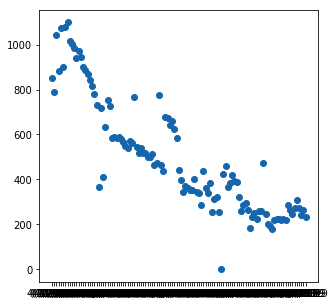

In [62]:
fig, txs = plt.subplots(1, sharex = True, figsize=(5,5))
txs.plot(Chapdfs[11]['PERIOD'], Chapdfs[11]['GROSS OIL'],marker='o', markersize = 6, alpha = 1, \
            linewidth=0, \
            c=wellcolor, label = wellname + ' '+ 'Oil Rate')

In [22]:
#Define Plot type
#def plotparameters(timeseries,tickmarks)
#    if 

In [63]:
ChapA = Chapdfs[11]

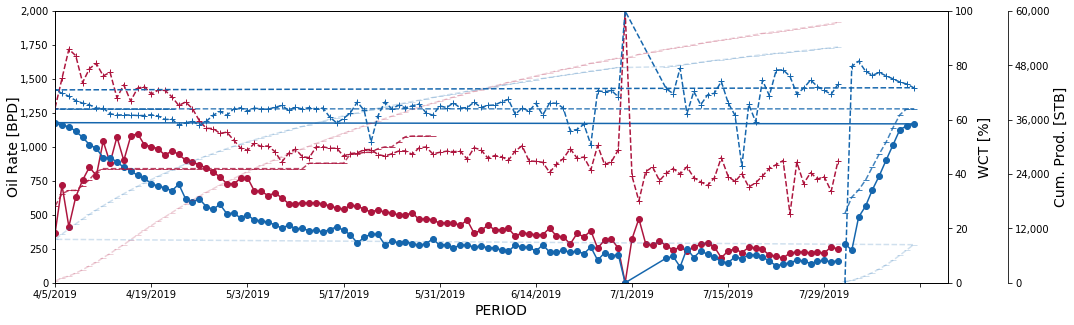

In [89]:
#import relevant datetime and plotting modules
import matplotlib
import pylab
from datetime import datetime
import matplotlib.dates as mdates
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU
    
labelfont = 14
NUM_COLORS = 6
cm = pylab.get_cmap('tab10')
#cm = pylab.get_cmap('tab20')

#Plot Production Data
fig, axs = plt.subplots(1, sharex = True, figsize=(16,5))
plt.subplots_adjust(hspace=0.1)
axcum = axs.twinx()
axwct = axs.twinx()
#timeseries = 'Days Online'
timeseries = 'PERIOD'
for i,well in enumerate(Comparewells):
    wellname = Comparewells[i].iloc[0,0]
    fm = Comparewells[i].iloc[0,14]
    #wellcolor = colormapfm[fm]
    #wellcolor = cm(1.*i/NUM_COLORS)
    wellcolor = plotcolors [i]
    axs.plot(Comparewells[i][timeseries], Comparewells[i]['GROSS OIL'],marker='o', markersize = 6, alpha = 1, \
            #linewidth=0, \
            c=wellcolor, label = wellname + ' '+ 'Oil Rate')
    axwct.plot(Comparewells[i][timeseries], (100*Comparewells[i]['GROSS WTR']/(Comparewells[i]['GROSS OIL']+Comparewells[i]['GROSS WTR'])),\
                   marker='+', linestyle = '--', c=wellcolor ,label=wellname + ' '+'Water Cut')
    axwct.plot(Comparewells[i][timeseries], Comparewells[i]['Choke'], \
                   marker='_', linestyle = '--', alpha = 0.8, c=wellcolor ,label=wellname + ' '+'Choke')
    #axgor.plot(Comparewells[i]['Days Online'], (Comparewells[i]['GROSS GAS']/(Comparewells[i]['GROSS OIL'])),\
    #               marker='_', linestyle = '--', c=wellcolor ,label=wellname + ' '+'GOR')
    #axcum = axs.twinx()
    axcum.spines['right'].set_position(('outward', 60))
    axcum.plot(Comparewells[i][timeseries], (Comparewells[i]['Cum Prod']),\
                                            marker='_', linestyle = '--',markersize = 6, alpha = 0.2, \
            c=wellcolor, label = wellname + ' '+ 'Total Liquid Rate')
    #axcum.plot(Chapdfs[9][timeseries], (Chapdfs[9]['Cum Prod']),\
    #                                        marker='_', linestyle = '--',markersize = 6, alpha = 0.2, \
    #        c='k', label = wellname + ' '+ 'Total Liquid Rate')       
    
#Add legends
#fig.legend(bbox_to_anchor=(0.25, 0.28, 0.55, 0.52),markerscale=3, fontsize = 16)
#ax.set_ylabel('Oil Rate [STB/D]',fontsize = 16)
axs.set_ylabel('Oil Rate [BPD]',fontsize = labelfont)
axs.set_ylim(bottom=0)
axs.set_xlim([0,130])

#ax.yaxis.set_label_coords(-0.03,0.5)
axwct.set_ylabel('WCT [%]',fontsize = labelfont)
axcum.set_ylabel('Cum. Prod. [STB]',fontsize = labelfont)
#ax.set_ylim(top=8000)
#ax.set_ylim(top=4500)

axwct.set_ylim([0,100])
axs.set_ylim([0,2000])
axcum.set_ylim([0,60000])
axs.set_xlabel(timeseries, fontsize = labelfont)

axs.yaxis.set_label_coords(-0.038,0.5)

#Normalize Tick Intervals on Left Y axis
y_min, y_max = axwct.get_ylim()
y2_min, y2_max = axcum.get_ylim()
ticks = [(tick - y_min)/(y_max - y_min) for tick in axwct.get_yticks()]
ticks2 = [tick * y2_max for tick in ticks]
axcum.set_yticks(ticks2)


#Add commas to Rates
axs.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
axcum.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
loc = plt.MultipleLocator(base=14.0) # this locator puts ticks at regular intervals
axs.xaxis.set_major_locator(loc)

#Reformat Date Series
#Set tick marks intervals for x-axis, set minor ticks daily, major ticks weekly (every monday)
days = mdates.DayLocator()
myFmt = mdates.DateFormatter("%m-%d")
weeks = mdates.WeekdayLocator(byweekday=MO)
#Assign ticks
#axs.xaxis.set_minor_locator(days)
#axs.xaxis.set_major_locator(weeks)
#axs.xaxis.set_major_formatter(myFmt)

#Save Image
#imageloc = folderloc +'/' + 'Foraker Pad 10n8 with choke seadarkgrey'+'.png'
#imageloc = PlotlocCSVs +'/' + 'Silvertip composite plot AlphaLZs'+'.png'
#imageloc = PlotlocCSVs +'/' + 'Silvertip composite plot UpperBetaLZs'+'.png'
#fig.savefig(imageloc, dpi=200, bbox_inches='tight')

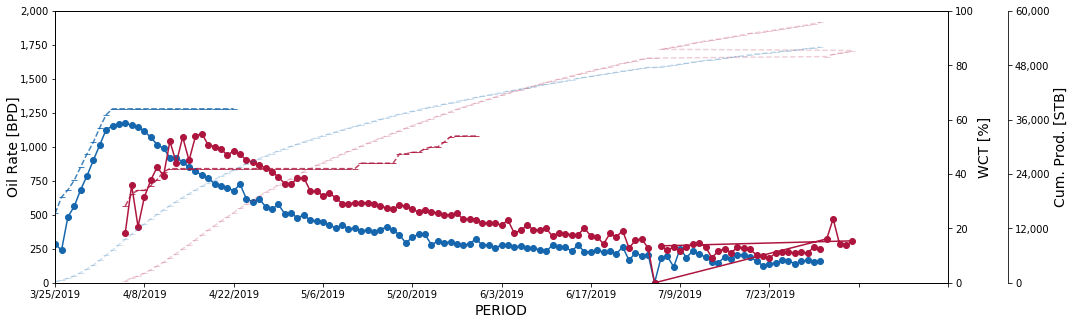

In [93]:
#Comparewells = [Chapdfs[1],Chapdfs[((11))]]
ChapB = Chapdfs[11]
ChapA = Chapdfs[1]
ColorA ='#1566ad'
ColorB = '#ad153e'
#plotcolors = ['#1566ad','#ad153e']

#import relevant datetime and plotting modules
import matplotlib
import pylab
from datetime import datetime
import matplotlib.dates as mdates
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU
    
labelfont = 14
NUM_COLORS = 6
cm = pylab.get_cmap('tab10')
#cm = pylab.get_cmap('tab20')

#Plot Production Data
fig, axs = plt.subplots(1, sharex = True, figsize=(16,5))
plt.subplots_adjust(hspace=0.1)
axcum = axs.twinx()
axwct = axs.twinx()
#timeseries = 'Days Online'
timeseries = 'PERIOD'

#ChapA.sort_values(timeseries, inplace = True)
#data.sort('COL1', inplace=True)
#np.sort(ChapA[timeseries])

wellname = ChapA.iloc[0,0]
#fm = Comparewells[i].iloc[0,14]
#wellcolor = colormapfm[fm]
#wellcolor = cm(1.*i/NUM_COLORS)
wellcolorA = ColorA
axs.plot(ChapA[timeseries],ChapA['GROSS OIL'],marker='o', markersize = 6, alpha = 1, \
        #linewidth=0, \
        c=wellcolorA, label = wellname + ' '+ 'Oil Rate')
#axwct.plot(ChapA[timeseries], (100*ChapA['GROSS WTR']/(ChapA['GROSS OIL']+ChapA['GROSS WTR'])),\
#               marker='+', linestyle = '--', c=wellcolorA ,label=wellname + ' '+'Water Cut')
axwct.plot(ChapA[timeseries], ChapA['Choke'], \
               marker='_', linestyle = '--', alpha = 0.8, c=wellcolorA ,label=wellname + ' '+'Choke')
axcum.spines['right'].set_position(('outward', 60))
axcum.plot(ChapA[timeseries], (ChapA['Cum Prod']),\
                                        marker='_', linestyle = '--',markersize = 6, alpha = 0.2, \
        c=wellcolorA, label = wellname + ' '+ 'Total Liquid Rate')


wellname = ChapB.iloc[0,0]
#fm = Comparewells[i].iloc[0,14]
#wellcolor = colormapfm[fm]
#wellcolor = cm(1.*i/NUM_COLORS)
wellcolorB = ColorB
axs.plot(ChapB[timeseries], ChapB['GROSS OIL'],marker='o', markersize = 6, alpha = 1, \
        #linewidth=0, \
        c=wellcolorB, label = wellname + ' '+ 'Oil Rate')
#axwct.plot(ChapB[timeseries], (100*ChapB['GROSS WTR']/(ChapB['GROSS OIL']+ChapB['GROSS WTR'])),\
#               marker='+', linestyle = '--', c=wellcolorB ,label=wellname + ' '+'Water Cut')
axwct.plot(ChapB[timeseries], ChapB['Choke'], \
               marker='_', linestyle = '--', alpha = 0.8, c=wellcolorB ,label=wellname + ' '+'Choke')
axcum.spines['right'].set_position(('outward', 60))
axcum.plot(ChapB[timeseries], (ChapB['Cum Prod']),\
                                        marker='_', linestyle = '--',markersize = 6, alpha = 0.2, \
        c=wellcolorB, label = wellname + ' '+ 'Total Liquid Rate')

    
#Add legends
#fig.legend(bbox_to_anchor=(0.25, 0.28, 0.55, 0.52),markerscale=3, fontsize = 16)
#ax.set_ylabel('Oil Rate [STB/D]',fontsize = 16)
axs.set_ylabel('Oil Rate [BPD]',fontsize = labelfont)
axs.set_ylim(bottom=0)
axs.set_xlim([0,140])

#ax.yaxis.set_label_coords(-0.03,0.5)
axwct.set_ylabel('WCT [%]',fontsize = labelfont)
axcum.set_ylabel('Cum. Prod. [STB]',fontsize = labelfont)
#ax.set_ylim(top=8000)
#ax.set_ylim(top=4500)

axwct.set_ylim([0,100])
axs.set_ylim([0,2000])
axcum.set_ylim([0,60000])
axs.set_xlabel(timeseries, fontsize = labelfont)

axs.yaxis.set_label_coords(-0.038,0.5)

#Normalize Tick Intervals on Left Y axis
y_min, y_max = axwct.get_ylim()
y2_min, y2_max = axcum.get_ylim()
ticks = [(tick - y_min)/(y_max - y_min) for tick in axwct.get_yticks()]
ticks2 = [tick * y2_max for tick in ticks]
axcum.set_yticks(ticks2)


#Add commas to Rates
axs.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
axcum.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
loc = plt.MultipleLocator(base=14.0) # this locator puts ticks at regular intervals
axs.xaxis.set_major_locator(loc)

#Reformat Date Series
#Set tick marks intervals for x-axis, set minor ticks daily, major ticks weekly (every monday)
days = mdates.DayLocator()
myFmt = mdates.DateFormatter("%m-%d")
weeks = mdates.WeekdayLocator(byweekday=MO)
#Assign ticks
#axs.xaxis.set_minor_locator(days)
#axs.xaxis.set_major_locator(weeks)
#axs.xaxis.set_major_formatter(myFmt)

#Save Image
#imageloc = folderloc +'/' + 'Foraker Pad 10n8 with choke seadarkgrey'+'.png'
#imageloc = PlotlocCSVs +'/' + 'Silvertip composite plot AlphaLZs'+'.png'
#imageloc = PlotlocCSVs +'/' + 'Silvertip composite plot UpperBetaLZs'+'.png'
#fig.savefig(imageloc, dpi=200, bbox_inches='tight')

In [56]:
ChapA = Chapdfs[11]

In [59]:
ChapA.sort

AttributeError: 'DataFrame' object has no attribute 'sort'